**LOAN PREDICTION**

**Importing Libraries**









In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold,train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score ,confusion_matrix, roc_curve,precision_score,recall_score,precision_recall_curve
import warnings
warnings.filterwarnings("ignore")

*Ingesting Source data and Loading as a dataframe*

In [62]:
df=pd.read_csv("LPD_Merged.csv")

Replacing values in Coulumns (Years in current job,Home Ownership) to ensure Standard Names

In [63]:
dict_yrsinjob = {'10+ years':11,'8 years':9,'9 years':10,'7 years':8,'6 years':7,'5 years':6,'4 years':5,'3 years':4,'2 years':3,'1 year':2,'< 1 year':1}
df.replace({'Years in current job':dict_yrsinjob}, inplace =True)

In [64]:
dict_hometype = {'HaveMortgage':'Home Mortgage'}
df.replace({'Home Ownership':dict_hometype}, inplace =True)

Checking for Missing Values

In [65]:
select_coloumns = ['Current Loan Amount','Term','Credit Score','household_income','Years in current job','Home Ownership','Loan_type','Monthly Debt','Years of Credit History','Loan Status','gender','age']

In [66]:
df=df[select_coloumns]
df

,Current Loan Amount,Term,Credit Score,household_income,Years in current job,Home Ownership,Loan_type,Monthly Debt,Years of Credit History,Loan Status,gender,age
0,555126,Long Term,718.0,91617.78,11.0,Rent,Personal Loan,14922.79,16.5,Charged Off,F,42.0
1,444708,Short Term,744.0,62472.27,9.0,Home Mortgage,Personal Loan,28156.86,21.4,Fully Paid,F,35.0
2,246796,Short Term,732.0,39021.90,7.0,Home Mortgage,Home Loan,7213.35,21.6,Fully Paid,F,44.0
3,387640,Short Term,745.0,NaN,4.0,Rent,Personal Loan,17192.72,10.7,Fully Paid,F,56.0
4,481294,Short Term,743.0,197798.37,1.0,Rent,Personal Loan,8690.98,27.0,Fully Paid,M,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,276254,Short Term,729.0,108253.62,11.0,Rent,Personal Loan,36370.37,20.2,Fully Paid,M,51.0
69996,136510,Short Term,716.0,80384.49,2.0,Home Mortgage,Personal Loan,6611.62,6.9,Charged Off,F,28.0
69997,267872,Short Term,NaN,89419.74,4.0,Home Mortgage,Personal Loan,15797.93,18.5,Charged Off,F,25.0
69998,216942,Short Term,735.0,113305.86,11.0,Own Home,other,11691.27,14.0,Charged Off,F,45.0


Renaming Columns

In [67]:
df = df.rename(columns={'Current Loan Amount': 'CurrentLoanAmount', 'Credit Score': 'CreditScore',
                        'Years in current job': 'YearsInCurrentJob',
                        'Home Ownership': 'HomeOwnership',
                       'Monthly Debt': 'Monthly_Debt',
                        'Years of Credit History': 'YearsOfCreditHistory',
                        'Loan Status': 'LoanStatus','gender': 'Gender','age':'Age'})

Checking for null values

In [68]:
pd.isnull(df).sum()

CurrentLoanAmount           0
Term                        0
CreditScore             13403
household_income        14288
YearsInCurrentJob        3009
HomeOwnership               0
Loan_type                   0
Monthly_Debt                0
YearsOfCreditHistory        0
LoanStatus                  0
Gender                      0
Age                         0
dtype: int64

Dropping Null values (About 27000 rows were dropped).Safe to drop as we still have 43K rows left which enoufg to train the model

In [69]:
df_drop=df.dropna(axis=0)
df.shape,df_drop.shape

((70000, 12), (43091, 12))

In [70]:
df=df_drop

# New Section

**Exploratory Data Analysis (EDA)**



> Checking Column header names



In [71]:
df.columns

Index(['CurrentLoanAmount', 'Term', 'CreditScore', 'household_income',
       'YearsInCurrentJob', 'HomeOwnership', 'Loan_type', 'Monthly_Debt',
       'YearsOfCreditHistory', 'LoanStatus', 'Gender', 'Age'],
      dtype='object')



> Checking Data Types of Columns





In [72]:
df.dtypes

CurrentLoanAmount         int64
Term                     object
CreditScore             float64
household_income        float64
YearsInCurrentJob       float64
HomeOwnership            object
Loan_type                object
Monthly_Debt            float64
YearsOfCreditHistory    float64
LoanStatus               object
Gender                   object
Age                     float64
dtype: object

In [73]:
df['Age'] = df['Age'].apply(pd.to_numeric)

In [74]:
df.dtypes

CurrentLoanAmount         int64
Term                     object
CreditScore             float64
household_income        float64
YearsInCurrentJob       float64
HomeOwnership            object
Loan_type                object
Monthly_Debt            float64
YearsOfCreditHistory    float64
LoanStatus               object
Gender                   object
Age                     float64
dtype: object



> Check the Number of Columns and Row


In [75]:
df.shape

(43091, 12)



> Check the Split of the target variable



In [76]:
 df['LoanStatus'].value_counts()

Fully Paid     34086
Charged Off     9005
Name: LoanStatus, dtype: int64

<Axes: >

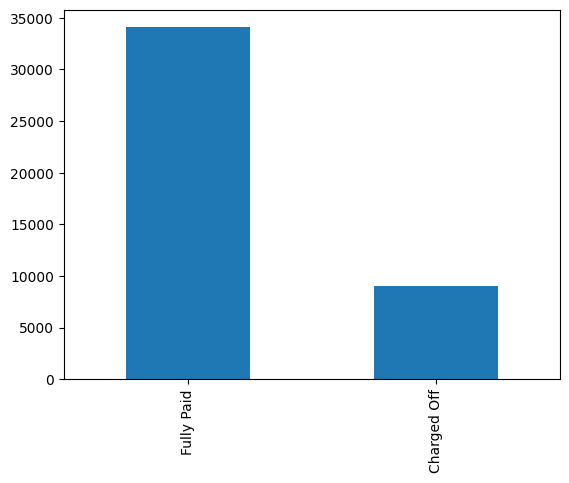

In [77]:
df['LoanStatus'].value_counts().plot.bar()

<Axes: xlabel='Term'>

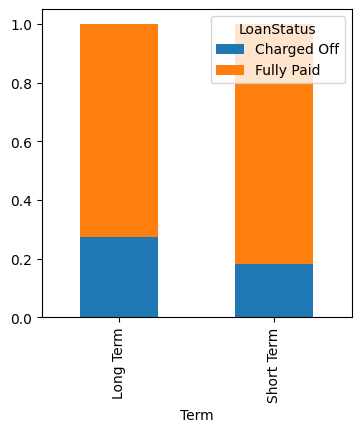

In [78]:
Term=pd.crosstab(df['Term'],df['LoanStatus'])
Term.div(Term.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<Axes: xlabel='Gender'>

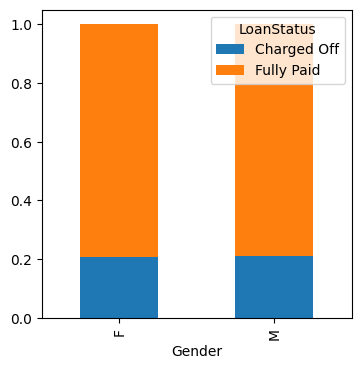

In [79]:
Term=pd.crosstab(df['Gender'],df['LoanStatus'])
Term.div(Term.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

We see a higher rate of defaulters for Long term loans which may indicate that the term might be a important parameter in determining default rate

<Axes: xlabel='YearsInCurrentJob'>

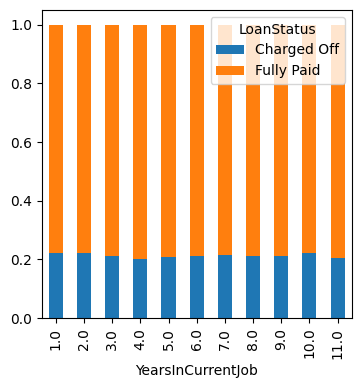

In [80]:
Term=pd.crosstab(df['YearsInCurrentJob'],df['LoanStatus'])
Term.div(Term.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

We dont see much varaiation in default rate when we consider the YearsInCurrentJob.This might not be a important parmeter or might not significantly determine whether a loan is defaulted or not

<Axes: xlabel='HomeOwnership'>

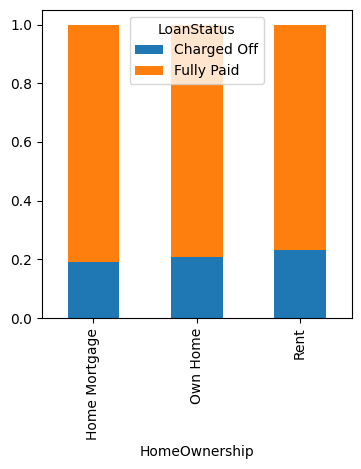

In [81]:
Term=pd.crosstab(df['HomeOwnership'],df['LoanStatus'])
Term.div(Term.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

We do see some variation in default rate when we consider Home ownership with people living under̥ rent tending to default more compared to ones living in homes under morgtgage.


<Axes: xlabel='Loan_type'>

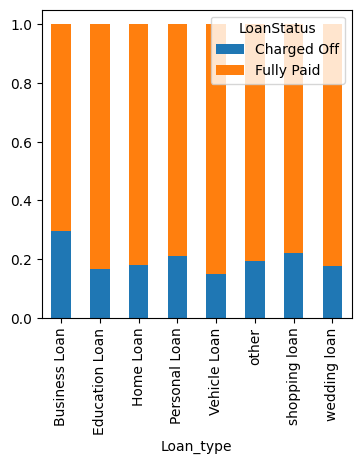

In [82]:
Term=pd.crosstab(df['Loan_type'],df['LoanStatus'])
Term.div(Term.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

We do see some variation in default rate when we consider Loan type with people taking business loans tending to default more while Home loans (typical low risk instrument) and Education loan having lower default rate

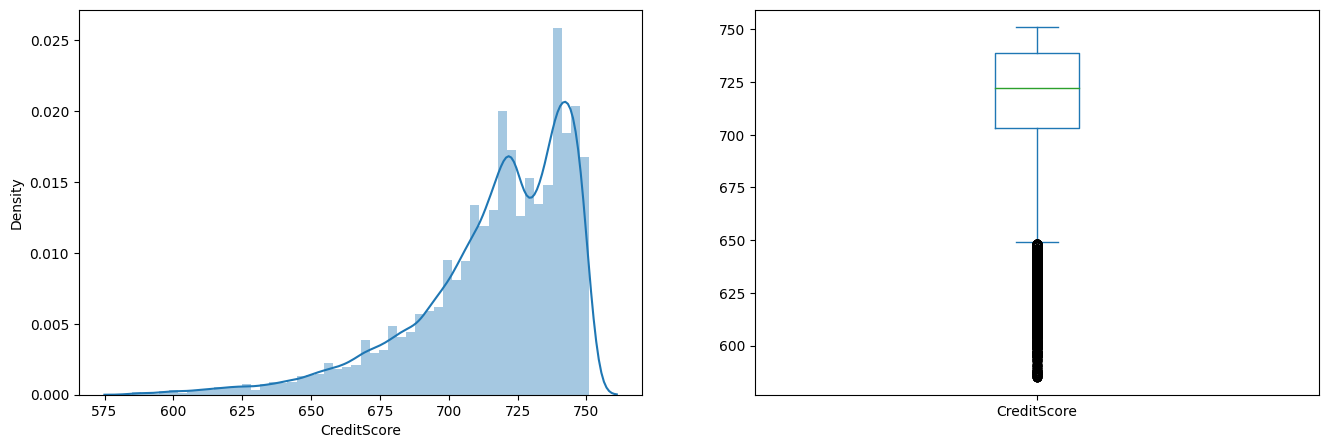

In [83]:
plt.subplot(121)
sns.distplot(df['CreditScore']);
plt.subplot(122)
df['CreditScore'].plot.box(figsize=(16,5));
plt.show()

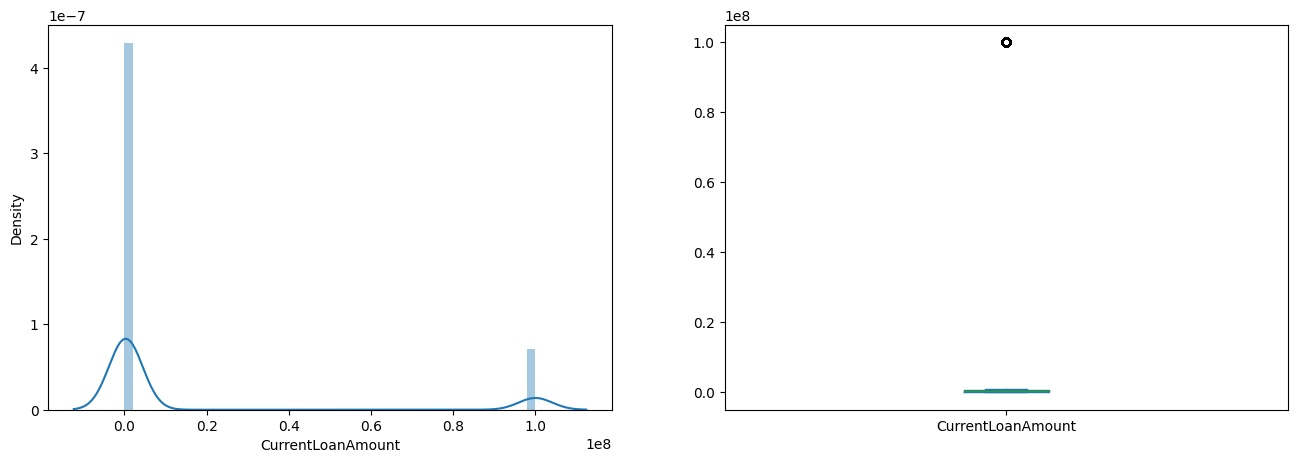

In [84]:
plt.subplot(121)
sns.distplot(df['CurrentLoanAmount']);
plt.subplot(122)
df['CurrentLoanAmount'].plot.box(figsize=(16,5));
plt.show()

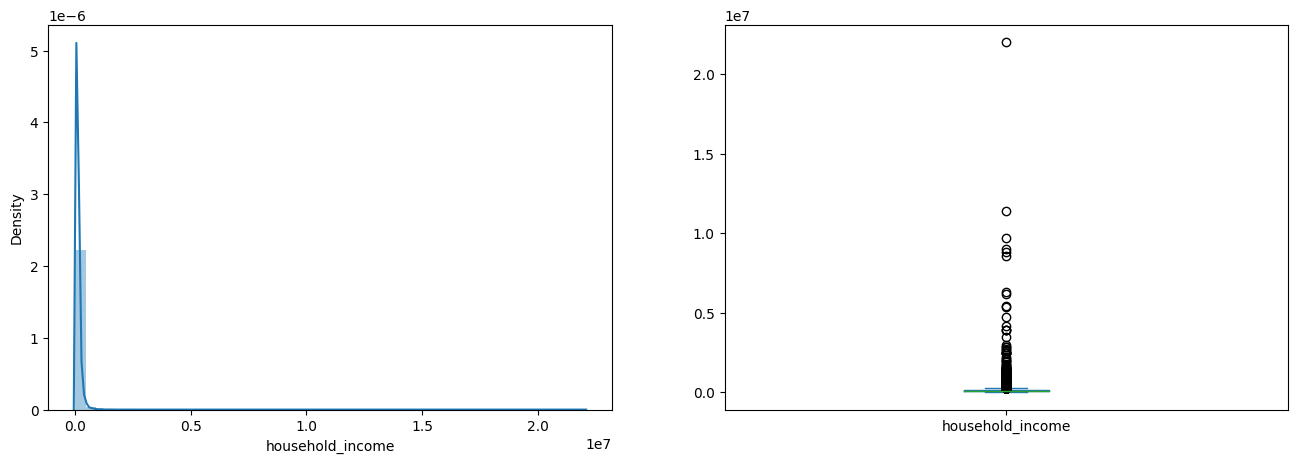

In [85]:
plt.subplot(121)
sns.distplot(df['household_income']);
plt.subplot(122)
df['household_income'].plot.box(figsize=(16,5));
plt.show()

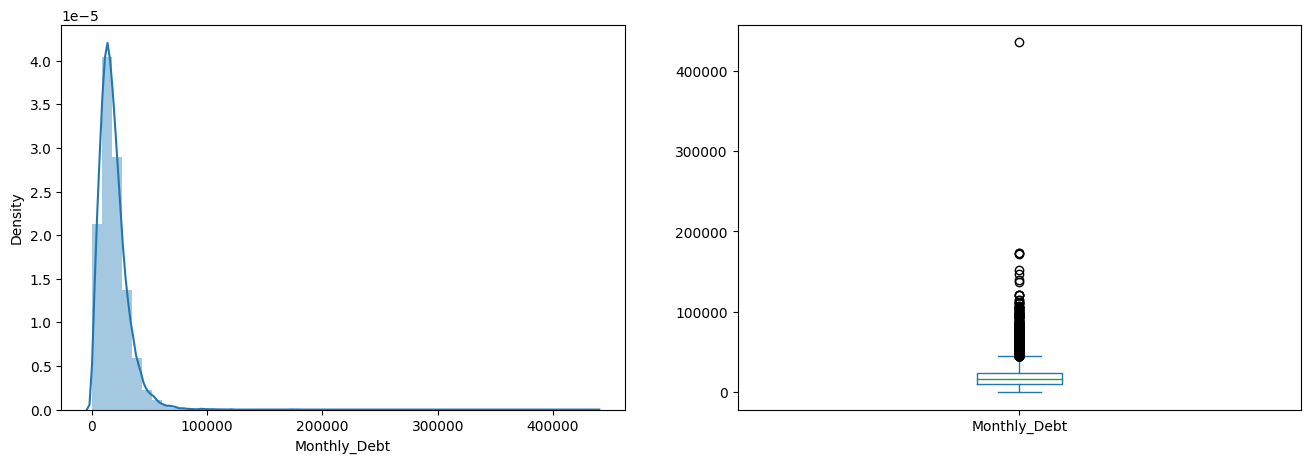

In [86]:

plt.subplot(121)
sns.distplot(df['Monthly_Debt']);
plt.subplot(122)
df['Monthly_Debt'].plot.box(figsize=(16,5));
plt.show()

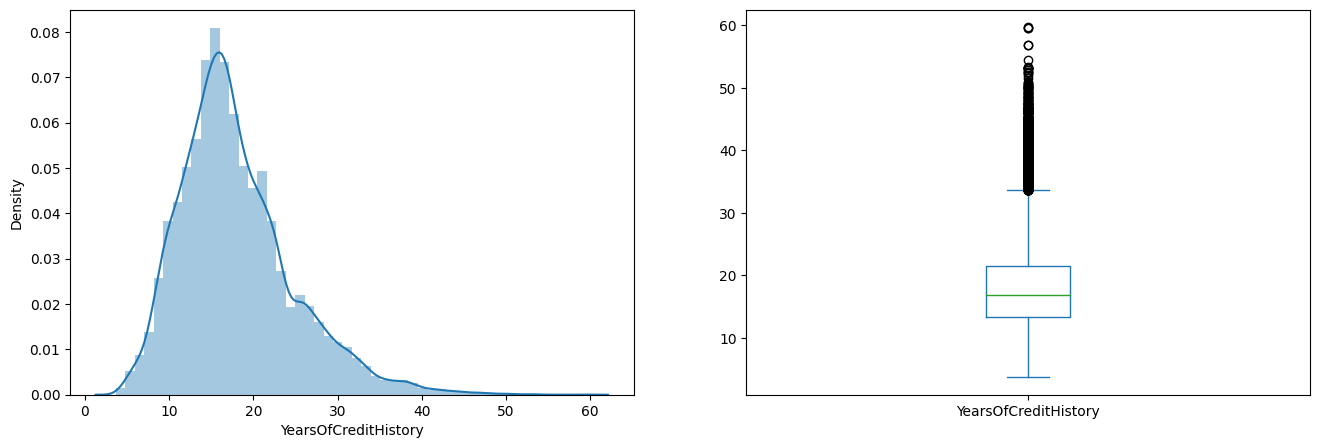

In [87]:
plt.subplot(121)
sns.distplot(df['YearsOfCreditHistory']);
plt.subplot(122)
df['YearsOfCreditHistory'].plot.box(figsize=(16,5));
plt.show()

<Axes: xlabel='LoanStatus'>

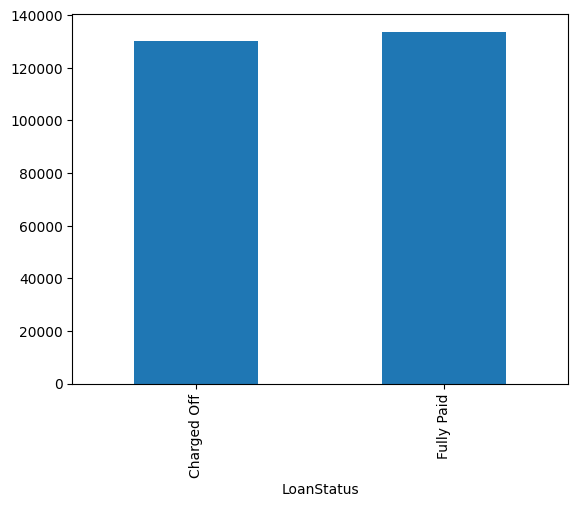

In [88]:
df.groupby('LoanStatus')['household_income'].mean().plot.bar()

<Axes: xlabel='LoanStatus'>

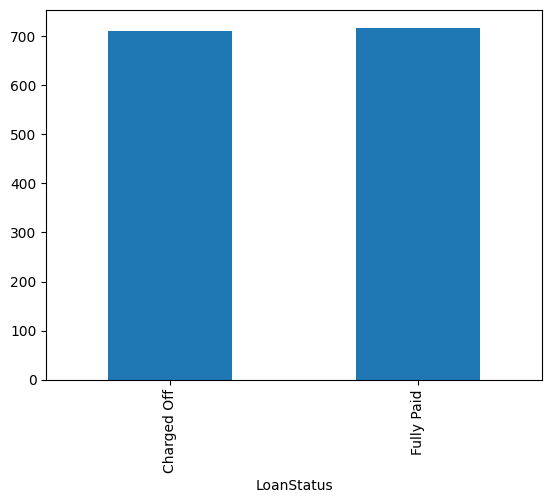

In [89]:
df.groupby('LoanStatus')['CreditScore'].mean().plot.bar()

<Axes: xlabel='LoanStatus'>

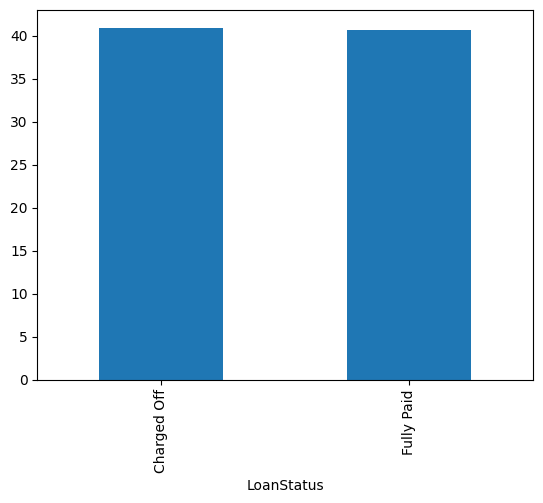

In [90]:
df.groupby('LoanStatus')['Age'].mean().plot.bar()

<Axes: xlabel='LoanStatus'>

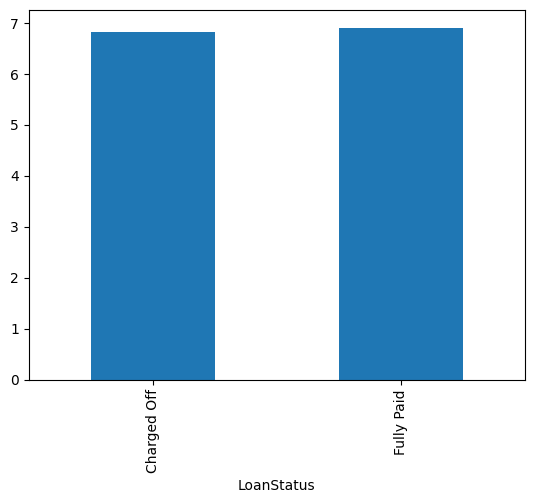

In [91]:
df.groupby('LoanStatus')['YearsInCurrentJob'].mean().plot.bar()

<Axes: xlabel='LoanStatus'>

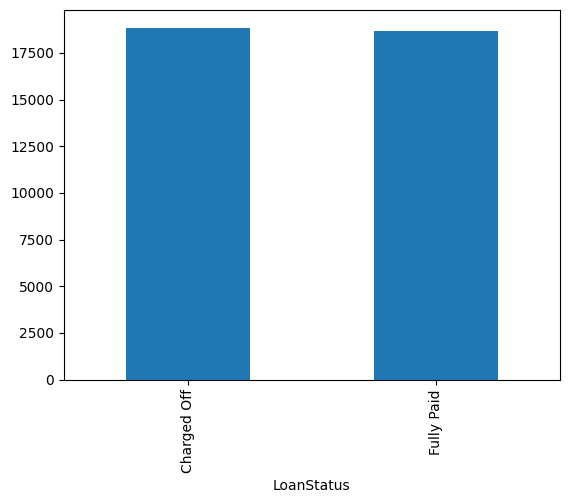

In [92]:
df.groupby('LoanStatus')['Monthly_Debt'].mean().plot.bar()

<Axes: xlabel='LoanStatus'>

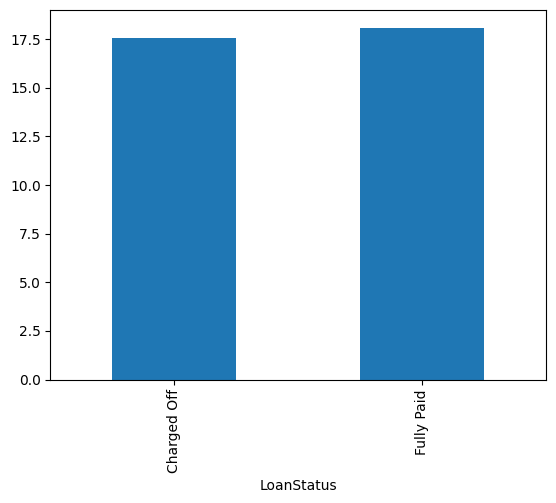

In [93]:
df.groupby('LoanStatus')['YearsOfCreditHistory'].mean().plot.bar()

In [94]:
df.dtypes

CurrentLoanAmount         int64
Term                     object
CreditScore             float64
household_income        float64
YearsInCurrentJob       float64
HomeOwnership            object
Loan_type                object
Monthly_Debt            float64
YearsOfCreditHistory    float64
LoanStatus               object
Gender                   object
Age                     float64
dtype: object

In [95]:
pd.isnull(df).sum()

CurrentLoanAmount       0
Term                    0
CreditScore             0
household_income        0
YearsInCurrentJob       0
HomeOwnership           0
Loan_type               0
Monthly_Debt            0
YearsOfCreditHistory    0
LoanStatus              0
Gender                  0
Age                     0
dtype: int64

In [96]:
df['LoanStatus'].replace('Fully Paid',1,inplace=True)
df['LoanStatus'].replace('Charged Off',0,inplace=True)

In [97]:
df1=pd.get_dummies(df_drop)

In [98]:
df=df1

In [99]:
df

,CurrentLoanAmount,CreditScore,household_income,YearsInCurrentJob,Monthly_Debt,YearsOfCreditHistory,LoanStatus,Age,Term_Long Term,Term_Short Term,...,Loan_type_Business Loan,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Loan_type_Vehicle Loan,Loan_type_other,Loan_type_shopping loan,Loan_type_wedding loan,Gender_F,Gender_M
0,555126,718.0,91617.78,11.0,14922.79,16.5,0,42.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,444708,744.0,62472.27,9.0,28156.86,21.4,1,35.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,246796,732.0,39021.90,7.0,7213.35,21.6,1,44.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,481294,743.0,197798.37,1.0,8690.98,27.0,1,39.0,0,1,...,0,0,0,1,0,0,0,0,0,1
6,108834,750.0,115668.93,11.0,11403.42,19.5,1,30.0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,215468,747.0,106547.64,6.0,3126.64,15.1,1,49.0,0,1,...,0,0,0,0,0,1,0,0,1,0
69994,99999999,727.0,73211.88,8.0,16527.53,10.0,1,49.0,0,1,...,0,0,0,1,0,0,0,0,1,0
69995,276254,729.0,108253.62,11.0,36370.37,20.2,1,51.0,0,1,...,0,0,0,1,0,0,0,0,0,1
69996,136510,716.0,80384.49,2.0,6611.62,6.9,0,28.0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [100]:
pd.isnull(df).sum()

CurrentLoanAmount              0
CreditScore                    0
household_income               0
YearsInCurrentJob              0
Monthly_Debt                   0
YearsOfCreditHistory           0
LoanStatus                     0
Age                            0
Term_Long Term                 0
Term_Short Term                0
HomeOwnership_Home Mortgage    0
HomeOwnership_Own Home         0
HomeOwnership_Rent             0
Loan_type_Business Loan        0
Loan_type_Education Loan       0
Loan_type_Home Loan            0
Loan_type_Personal Loan        0
Loan_type_Vehicle Loan         0
Loan_type_other                0
Loan_type_shopping loan        0
Loan_type_wedding loan         0
Gender_F                       0
Gender_M                       0
dtype: int64

In [101]:
df=df.reset_index(drop=True)
df

,CurrentLoanAmount,CreditScore,household_income,YearsInCurrentJob,Monthly_Debt,YearsOfCreditHistory,LoanStatus,Age,Term_Long Term,Term_Short Term,...,Loan_type_Business Loan,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Loan_type_Vehicle Loan,Loan_type_other,Loan_type_shopping loan,Loan_type_wedding loan,Gender_F,Gender_M
0,555126,718.0,91617.78,11.0,14922.79,16.5,0,42.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,444708,744.0,62472.27,9.0,28156.86,21.4,1,35.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,246796,732.0,39021.90,7.0,7213.35,21.6,1,44.0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,481294,743.0,197798.37,1.0,8690.98,27.0,1,39.0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,108834,750.0,115668.93,11.0,11403.42,19.5,1,30.0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43086,215468,747.0,106547.64,6.0,3126.64,15.1,1,49.0,0,1,...,0,0,0,0,0,1,0,0,1,0
43087,99999999,727.0,73211.88,8.0,16527.53,10.0,1,49.0,0,1,...,0,0,0,1,0,0,0,0,1,0
43088,276254,729.0,108253.62,11.0,36370.37,20.2,1,51.0,0,1,...,0,0,0,1,0,0,0,0,0,1
43089,136510,716.0,80384.49,2.0,6611.62,6.9,0,28.0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CurrentLoanAmount,43091.0,1.442928e+07,3.474982e+07,11242.00,191081.000,326634.00,553300.00,99999999.00
CreditScore,43091.0,7.163154e+02,2.828812e+01,585.00,703.000,722.00,739.00,751.00
household_income,43091.0,1.330466e+05,1.994468e+05,6875.01,68915.415,101675.16,155092.41,22034738.76
YearsInCurrentJob,43091.0,6.893017e+00,3.633522e+00,1.00,4.000,7.00,11.00,11.00
Monthly_Debt,43091.0,1.872657e+04,1.229074e+04,0.00,10452.090,16448.11,24273.64,435843.28
YearsOfCreditHistory,43091.0,1.797504e+01,6.782844e+00,3.70,13.400,16.80,21.50,59.70
LoanStatus,43091.0,7.910236e-01,4.065822e-01,0.00,1.000,1.00,1.00,1.00
Age,43091.0,4.069801e+01,1.717481e+01,2.00,25.000,39.00,51.00,113.00
Term_Long Term,43091.0,2.922884e-01,4.548194e-01,0.00,0.000,0.00,1.00,1.00
Term_Short Term,43091.0,7.077116e-01,4.548194e-01,0.00,0.000,1.00,1.00,1.00


<Axes: xlabel='household_income'>

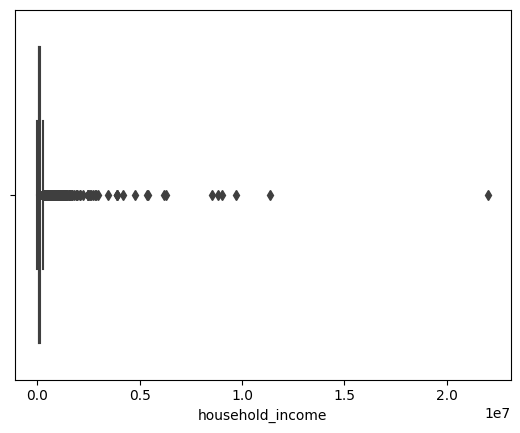

In [103]:
sns.boxplot(x=df['household_income'])

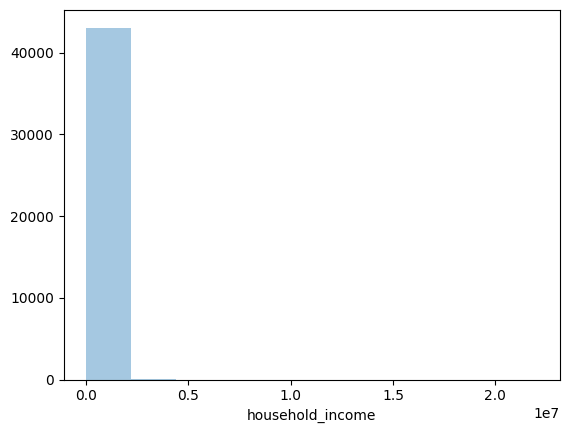

In [104]:
sns.distplot(df['household_income'],bins=10,kde= False)
plt.show()

# New Section

Feature Engineering-Adding a New column which calculates the net income

In [105]:
df['NetIncome'] = df['household_income'] - df['Monthly_Debt']
df.describe()

,CurrentLoanAmount,CreditScore,household_income,YearsInCurrentJob,Monthly_Debt,YearsOfCreditHistory,LoanStatus,Age,Term_Long Term,Term_Short Term,...,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Loan_type_Vehicle Loan,Loan_type_other,Loan_type_shopping loan,Loan_type_wedding loan,Gender_F,Gender_M,NetIncome
count,4.309100e+04,43091.000000,4.309100e+04,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,...,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,43091.000000,4.309100e+04
mean,1.442928e+07,716.315449,1.330466e+05,6.893017,18726.568037,17.975044,0.791024,40.698011,0.292288,0.707712,...,0.000975,0.065327,0.805458,0.012787,0.092363,0.003597,0.001184,0.447518,0.552482,1.143201e+05
std,3.474982e+07,28.288125,1.994468e+05,3.633522,12290.739517,6.782844,0.406582,17.174815,0.454819,0.454819,...,0.031205,0.247105,0.395852,0.112355,0.289541,0.059868,0.034383,0.497244,0.497244,1.998354e+05
min,1.124200e+04,585.000000,6.875010e+03,1.000000,0.000000,3.700000,0.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.090547e+05
25%,1.910810e+05,703.000000,6.891542e+04,4.000000,10452.090000,13.400000,1.000000,25.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.038855e+04
50%,3.266340e+05,722.000000,1.016752e+05,7.000000,16448.110000,16.800000,1.000000,39.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.362737e+04
75%,5.533000e+05,739.000000,1.550924e+05,11.000000,24273.640000,21.500000,1.000000,51.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.372954e+05
max,1.000000e+08,751.000000,2.203474e+07,11.000000,435843.280000,59.700000,1.000000,113.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.201522e+07


In [106]:
df

,CurrentLoanAmount,CreditScore,household_income,YearsInCurrentJob,Monthly_Debt,YearsOfCreditHistory,LoanStatus,Age,Term_Long Term,Term_Short Term,...,Loan_type_Education Loan,Loan_type_Home Loan,Loan_type_Personal Loan,Loan_type_Vehicle Loan,Loan_type_other,Loan_type_shopping loan,Loan_type_wedding loan,Gender_F,Gender_M,NetIncome
0,555126,718.0,91617.78,11.0,14922.79,16.5,0,42.0,1,0,...,0,0,1,0,0,0,0,1,0,76694.99
1,444708,744.0,62472.27,9.0,28156.86,21.4,1,35.0,0,1,...,0,0,1,0,0,0,0,1,0,34315.41
2,246796,732.0,39021.90,7.0,7213.35,21.6,1,44.0,0,1,...,0,1,0,0,0,0,0,1,0,31808.55
3,481294,743.0,197798.37,1.0,8690.98,27.0,1,39.0,0,1,...,0,0,1,0,0,0,0,0,1,189107.39
4,108834,750.0,115668.93,11.0,11403.42,19.5,1,30.0,0,1,...,0,0,1,0,0,0,0,1,0,104265.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43086,215468,747.0,106547.64,6.0,3126.64,15.1,1,49.0,0,1,...,0,0,0,0,1,0,0,1,0,103421.00
43087,99999999,727.0,73211.88,8.0,16527.53,10.0,1,49.0,0,1,...,0,0,1,0,0,0,0,1,0,56684.35
43088,276254,729.0,108253.62,11.0,36370.37,20.2,1,51.0,0,1,...,0,0,1,0,0,0,0,0,1,71883.25
43089,136510,716.0,80384.49,2.0,6611.62,6.9,0,28.0,0,1,...,0,0,1,0,0,0,0,1,0,73772.87


Handling Outliers by trimming

In [107]:

# setting a different outlier range for the IQR method
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# creating a new dataframe to hold the trimmed data
df_trimmed = pd.DataFrame(columns=df.columns)

# appending rows that are within the IQR range to the new dataframe
for i in range(0, df.shape[0]):
    if df.loc[i, 'Age'] <= Q3 + 1.5 * IQR:
        df_trimmed = df_trimmed.append(df.loc[i])

print("Original DataFrame:")
print(df)
print("\nTrimmed DataFrame:")
print(df_trimmed)

Original DataFrame:
       CurrentLoanAmount  CreditScore  household_income  YearsInCurrentJob  \
0                 555126        718.0          91617.78               11.0   
1                 444708        744.0          62472.27                9.0   
2                 246796        732.0          39021.90                7.0   
3                 481294        743.0         197798.37                1.0   
4                 108834        750.0         115668.93               11.0   
...                  ...          ...               ...                ...   
43086             215468        747.0         106547.64                6.0   
43087           99999999        727.0          73211.88                8.0   
43088             276254        729.0         108253.62               11.0   
43089             136510        716.0          80384.49                2.0   
43090             216942        735.0         113305.86               11.0   

       Monthly_Debt  YearsOfCreditHistory  

In [108]:

df=df_trimmed

Normalization by Scaling (Min Max)

In [109]:
from sklearn.preprocessing import MinMaxScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [110]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Taking a dump to csv.This file is used for training in Azure ML studio and further deployment was done in Azure ML studio

In [111]:
df.to_csv('NewDataAzureML01112023_01.csv')

In [112]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Training Model and Prediction

In [113]:
# Split the data into train and test sets
X = df.drop('LoanStatus', axis=1)
y = df['LoanStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Create and train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict the test set results for both models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)



Printing Metrics

In [114]:
 #Calculate the accuracy, precision, recall, F1 score, ROC AUC curve details and confusion matrix for both models
print('Accuracy')
print('Logistic Regression: ', accuracy_score(y_test, lr_pred))
print('Random Forest: ', accuracy_score(y_test, rf_pred))

print('Precision')
print('Logistic Regression: ', precision_score(y_test, lr_pred))
print('Random Forest: ', precision_score(y_test, rf_pred))

print('Recall')
print('Logistic Regression: ', recall_score(y_test, lr_pred))
print('Random Forest: ', recall_score(y_test, rf_pred))

print('F1 Score')
print('Logistic Regression: ', f1_score(y_test, lr_pred))
print('Random Forest: ', f1_score(y_test, rf_pred))

print('Confusion Matrix')
print('Logistic Regression: ', confusion_matrix(y_test, lr_pred))
print('Random Forest: ', confusion_matrix(y_test, rf_pred))

Accuracy
Logistic Regression:  0.7871246640962729
Random Forest:  0.7847879425166492
Precision
Logistic Regression:  0.7871917728175762
Random Forest:  0.7900912646675359
Recall
Logistic Regression:  0.9998515659789223
Random Forest:  0.9894611845034882
F1 Score
Logistic Regression:  0.880868314371649
Random Forest:  0.8786081455120601
Confusion Matrix
Logistic Regression:  [[   1 1821]
 [   1 6736]]
Random Forest:  [[  51 1771]
 [  71 6666]]


HyperParameter Tuning

In [115]:
# Split the data into train and test sets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
X_train1, X_test1, y_train1, y_test1 = train_test_split(df.drop('LoanStatus', axis=1), df['LoanStatus'], test_size=0.2, random_state=42)
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier()
}


In [116]:

# Create a dictionary of hyperparameter grids
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]
    }
}

Improting Pickle File

In [117]:

import pickle
pickle_out = open("rf_model.pkl","wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()